In [1]:
from src.solution import MultiODPath, MultiODSolution
from src.problem import MultiODProblem
from src.operators import *
from src.utils import display_result

p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
paths = [[0, 1, 9, 8, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]
paths1 = [[0, 1, 8, 9, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths2 = [[0, 1, 9, 8, 16, 5, 17, 3, 2, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths3 = [[i for i in range(18)] + [0]]
s = MultiODSolution(paths3, p)

In [2]:
path = s.paths[0]

In [28]:
o1 = TwoOptOperator()
o2 = ExchangeOperator()
o3 = InsertOperator()
o4 = OForwardOperator(length=2)
o5 = DBackwardOperator(length=2)
o6 = ODPairsExchangeOperator()
o7 = RandomODPairsExchangeOperator(change_percentage=0.1)
o8 = RandomOForwardOperator(change_percentage=0.1)
o9 = RandomDBackwardOperator(change_percentage=0.1)
o10 = OForwardOperator(length=3)
o11 = SegmentTwoOptOperator()
o12 = OForwardOperator(length=1)
o13 = DBackwardOperator(length=1)

In [59]:
# randomly exchange OD pairs given certain percentage
improved_path, min_delta, label = o11(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))
# fig = display_result(p, s)

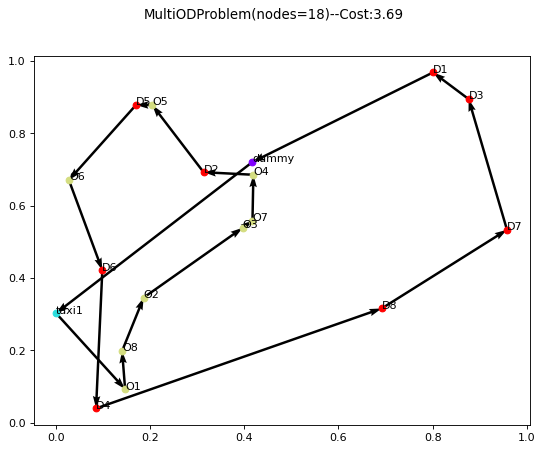

In [58]:
fig = display_result(p, s)

In [1]:
# read ortools tour 
def get_ortools_tour(tour_path, skip_first_lines: int = 3, num_taxi: int = 1):
    with open(tour_path) as f:
        for _ in range(skip_first_lines):
            next(f)
        tour_before_adding_dummy = list(map(int, f.readline().rstrip().split(' -> ')))
        tour = [0] + tour_before_adding_dummy[:-1] + [0]
    return tour 

In [2]:
import os 
ortools_dir = os.path.join('/home/fangbowen/', 'tmp', 'ortools')
ortools_results = os.listdir(ortools_dir)

In [20]:
res = 'random-005-12239.3186.txt'
res

'random-005-12239.3186.txt'

In [21]:
tour = get_ortools_tour(os.path.join(ortools_dir, res))

In [11]:
from src.problem import MultiODProblem
from src.solution import MultiODSolution
from src.utils import read_instance_data, display_result

/opt/conda/envs/rlor38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
instance_dir = os.path.join('data', 'tsppdlib', 'instances', 'random-uniform')
locations = read_instance_data(os.path.join(instance_dir, 'random-005-12239.tsp'))
p = MultiODProblem(locations=locations, ignore_to_dummy_cost=False, ignore_from_dummy_cost=False)
p.convert_distance_matrix_to_int()
sol = MultiODSolution([tour], p)

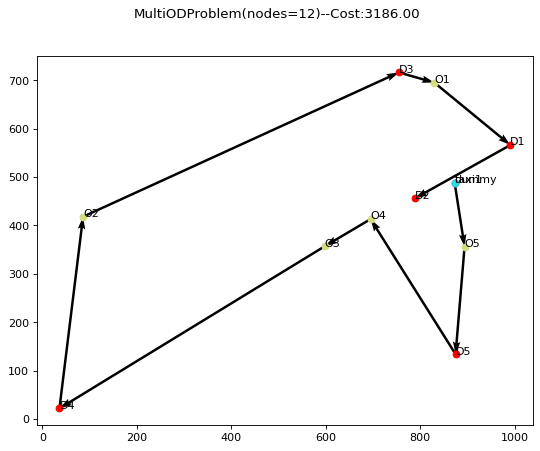

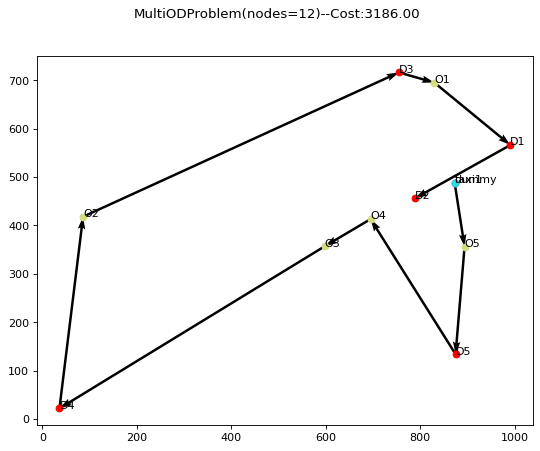

In [25]:
display_result(p, sol)

In [2]:
import os 

gurobi_dir = os.path.join('/home/fangbowen/', 'tmp', 'gurobi')
gurobi_results = os.listdir(gurobi_dir)

In [3]:
with open(gurobi_results) as f:
    

['random-005-28289.3603.836603004972.txt',
 'random-010-22886.5152.098271230667.txt',
 'random-005-28326.3543.4716942610517.txt',
 'random-010-19739.4687.644118037693.txt',
 'random-005-20526.2813.17132005029.txt',
 'random-010-23001.3497.735297113447.txt',
 'random-010-20339.5453.540080723228.txt',
 'random-010-31073.4846.26890166019.txt',
 'random-010-05876.4513.604730870254.txt',
 'random-010-10083.4471.893418196611.txt',
 'random-005-27025.3035.951291680046.txt',
 'random-005-02153.3527.551668805264.txt',
 'random-005-22010.3195.9480630264543.txt',
 'random-005-17639.3600.6921815369583.txt',
 'random-005-14459.3672.114210538996.txt',
 'random-005-16646.3147.3955932037597.txt',
 'random-005-12239.3190.3726544219207.txt',
 'random-005-13726.3435.9018934131477.txt',
 'random-010-11763.4661.438405775461.txt',
 'random-005-21291.3597.4848072235045.txt',
 'random-005-06203.2972.0365265163964.txt',
 'random-010-23697.3724.2869404030566.txt',
 'random-005-27053.3032.7366100286085.txt',
 'r